In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 74.4 MB/s eta 0:00:00


In [3]:
pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 5.1 MB/s eta 0:00:00


In [4]:
pip install keplergl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 52.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jedi-0.18.2-py2.py3-none-any.whl (1.6 MB)
  Created wheel for keplergl: filename=keplergl-0.3.2-py2.py3-none-any.whl size=17922320 sha256=d2b37ba5ba83d11baae6a8ff9f2d67801164db9bfc97057e469b56ac3063576a
  Stored in directory: /root/.cache/pip/wheels/e5/e9/db/b8b8f2fcb5cb1cd7268d88959fce267bc00697cb8f50dcd0d9
Successfully built keplergl


In [5]:
! pip install pyarrow
! pip install pyshp
! pip install shapely
! pip install descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# Import libraries
import pandas as pd
import numpy as np
import os
from tqdm.notebook import tqdm

In [7]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import plotly.express as px
from keplergl import KeplerGl
import shapefile
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch

In [8]:
#carreguem fitxer amb stations
# stations=pd.read_csv('files/Inventari_docks_stations_2022.csv', delimiter=";", encoding='latin-1')
# stations=pd.read_csv('/content/Inventari_docks_stations_2022.csv', delimiter=";", encoding='latin-1')
stations=pd.read_csv('/content/drive/MyDrive/Bicing/Inventari_docks_stations_2022.csv', delimiter=";", encoding='latin-1')

In [9]:
stations.head()

,station_id,name,lat,lon,altitude,address,post_code,district,capacity,weather_station
0,1,"GRAN VIA CORTS CATALANES, 760",41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,Eixample,46,X4
1,2,"C/ ROGER DE FLOR, 126",41.395488,2.177198,17.0,"C/ ROGER DE FLOR, 126",8013,Eixample,29,X4
2,3,"C/ NÃPOLS, 82",41.394156,2.181331,11.0,"C/ NÃPOLS, 82",8013,Eixample,27,X4
3,4,"C/ RIBES, 13",41.393317,2.181248,8.0,"C/ RIBES, 13",8013,Eixample,21,X4
4,5,"PG. LLUIS COMPANYS, 11 (ARC TRIOMF)",41.391103,2.180176,7.0,"PG. LLUIS COMPANYS, 11 (ARC TRIOMF)",8018,Sant Martí,39,X4


In [10]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station_id       505 non-null    int64  
 1   name             505 non-null    object 
 2   lat              505 non-null    float64
 3   lon              505 non-null    float64
 4   altitude         505 non-null    float64
 5   address          505 non-null    object 
 6   post_code        505 non-null    int64  
 7   district         505 non-null    object 
 8   capacity         505 non-null    int64  
 9   weather_station  505 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 39.6+ KB


In [11]:
df_stations = stations[["station_id","name","lat","lon"]].drop_duplicates()

In [12]:
from google.colab import output
output.enable_custom_widget_manager()

In [13]:
#DISTRIBUCIÓ DE LES ESTACIONS DE BICING A BARCELONA
stations_map = KeplerGl(height=600, data={"stations": df_stations})
stations_map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'stations':      station_id                                 name        lat       lon
0        …

In [14]:
#importem el dataset d'informació de districtes de Bcn
url = 'https://raw.githubusercontent.com/jcanalesluna/bcn-geodata/master/districtes/districtes.geojson'
districts = gpd.read_file(url)


In [15]:
#creem llista amb els districtes de Bcn
my_districts=['Ciutat Vella','Eixample','Sants-Montjuïc', 'Les Corts', 'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó', 'Nou Barris', 'Sant Andreu', 'Sant Martí']

In [16]:
#afegim llista com una nova columna al DF
districts.insert(2, "district_name", my_districts, True)

In [17]:
districts

,ID_ANNEX,ANNEXDESCR,district_name,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,...,ESTIL_ID,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,Ciutat Vella,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
1,01,Grup - I,Eixample,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18690 41.40165, 2.18689 41.40087, ..."
2,01,Grup - I,Sants-Montjuïc,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3..."
3,01,Grup - I,Les Corts,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.10342 41.40110, 2.10352 41.40109, ..."
4,01,Grup - I,Sarrià-Sant Gervasi,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.07313 41.43522, 2.07319 41.4..."
5,01,Grup - I,Gràcia,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.13629 41.42363, 2.13640 41.42358, ..."
6,01,Grup - I,Horta-Guinardó,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.15949 41.44977, 2.15942 41.44960, ..."
7,01,Grup - I,Nou Barris,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18706 41.46772, 2.18711 41.46711, ..."
8,01,Grup - I,Sant Andreu,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18764 41.46212, 2.18765 41.46208, ..."
9,01,Grup - I,Sant Martí,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.20736 41.42711, 2.20698 41.42665, ..."


In [18]:
#transformen fitxer
districts.to_file("districts.geojson", driver="GeoJSON")

In [19]:
#afegim crs per transformar coordenades
districts.to_crs(epsg=2062, inplace=True)
districts.crs

<Projected CRS: EPSG:2062>
Name: Madrid 1870 (Madrid) / Spain LCC
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Spain - mainland onshore.
- bounds: (-9.37, 35.95, 3.39, 43.82)
Coordinate Operation:
- name: Spain
- method: Lambert Conic Conformal (1SP)
Datum: Madrid 1870 (Madrid)
- Ellipsoid: Struve 1860
- Prime Meridian: Madrid

In [20]:
#afegim crs per transformar coordenades
districts.crs

<Projected CRS: EPSG:2062>
Name: Madrid 1870 (Madrid) / Spain LCC
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Spain - mainland onshore.
- bounds: (-9.37, 35.95, 3.39, 43.82)
Coordinate Operation:
- name: Spain
- method: Lambert Conic Conformal (1SP)
Datum: Madrid 1870 (Madrid)
- Ellipsoid: Struve 1860
- Prime Meridian: Madrid

In [21]:
#afegim columna area
districts['area'] = districts.area / 1000000


In [22]:
#afegim centroide
districts['centroid']=districts.centroid


In [23]:
#Fem una mapa amb els carrils Bici de Bcn
# url = 'https://opendata-ajuntament.barcelona.cat/resources/bcn/CarrilsBici/CARRIL_BICI.geojson'
bike_lane = gpd.read_file('/content/drive/MyDrive/Bicing/CARRIL_BICI.geojson.txt')
bike_lane = bike_lane.loc[:,['ID','geometry']]
bike_lane.to_crs(epsg=2062, inplace=True)

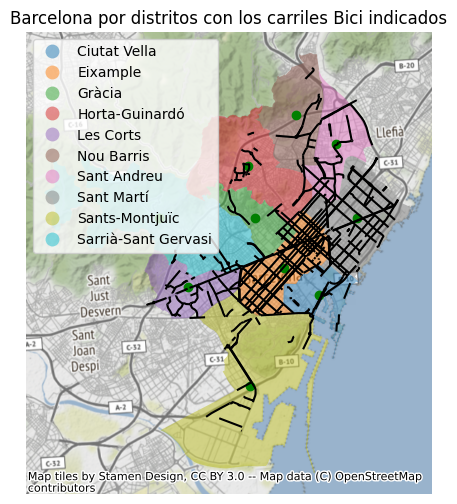

In [24]:
#MAPA DE BARCELONA PER DISTRICTES AMB ELS CARRILS BICI INDICATS
import contextily
ax= districts.plot(column='district_name', figsize=(12,6), alpha=0.5, legend=True)
districts["centroid"].plot(ax=ax, color="green")
bike_lane.plot(ax=ax, color='black')
contextily.add_basemap(ax, crs=districts.crs.to_string())
plt.title('Barcelona por distritos con los carriles Bici indicados')
plt.axis('off')
plt.show()

In [25]:
#busquem interseccions
lanes_districts = gpd.sjoin(districts, bike_lane, how='inner', predicate='intersects')


In [26]:
#NÚMERO DE CARRILS BICI PER DISTRICTE
print('El total de carriles Bici por distrito son:')
lanes_districts.groupby('district_name').size().sort_values(ascending=False)

El total de carriles Bici por distrito son:


district_name
Eixample               134
Sant Martí              85
Les Corts               45
Sants-Montjuïc          45
Sant Andreu             38
Ciutat Vella            34
Horta-Guinardó          29
Nou Barris              27
Sarrià-Sant Gervasi     20
Gràcia                  16
dtype: int64

In [27]:
#afegim columna boundary
districts['boundary']=districts.boundary

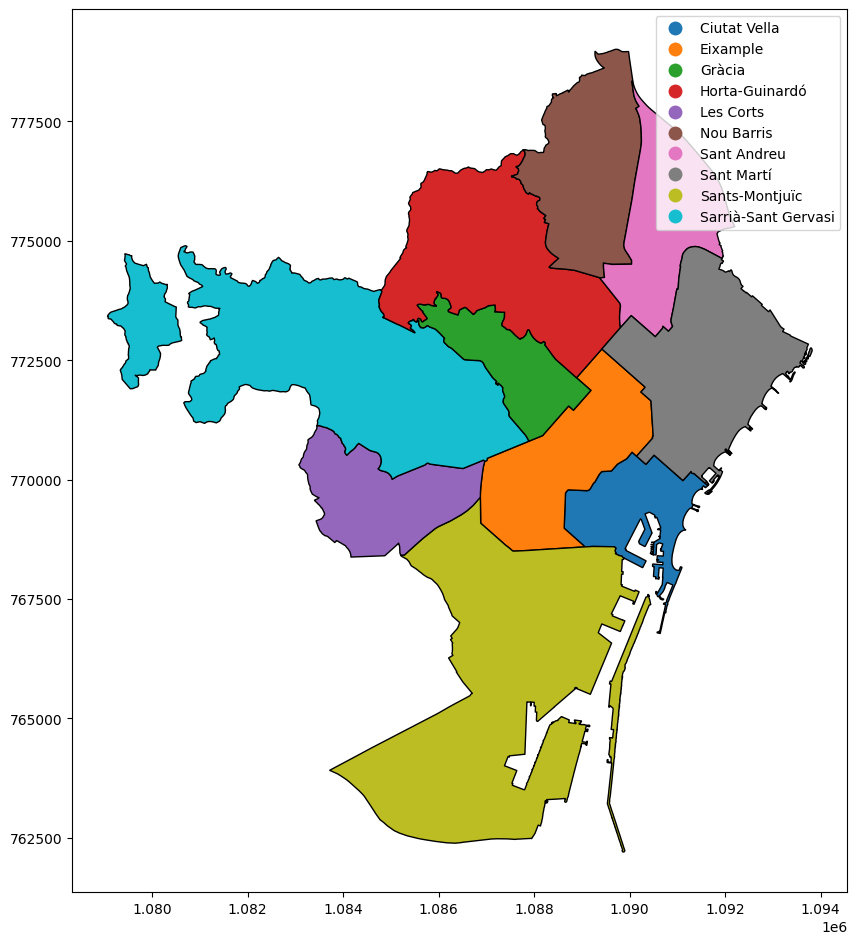

In [28]:
#generem mapa de Bcn per districtes
#ax= districts.plot(figsize=(10,6))
ax= districts.plot(column='district_name', figsize=(10,12), edgecolor='black', legend=True)

In [29]:
#localitzem un punt emblemàtic (Temple de la Sagrada Família)
from shapely.geometry import Point

sagrada_fam = Point(2.1743680500855005, 41.403656946781304)
sagrada_fam = gpd.GeoSeries(sagrada_fam, crs=4326)
sagrada_fam= sagrada_fam.to_crs(epsg=2062)
districts['sagrada_fam_dist'] = [float(sagrada_fam.distance(centroid)) / 1000 for centroid in districts.centroid]

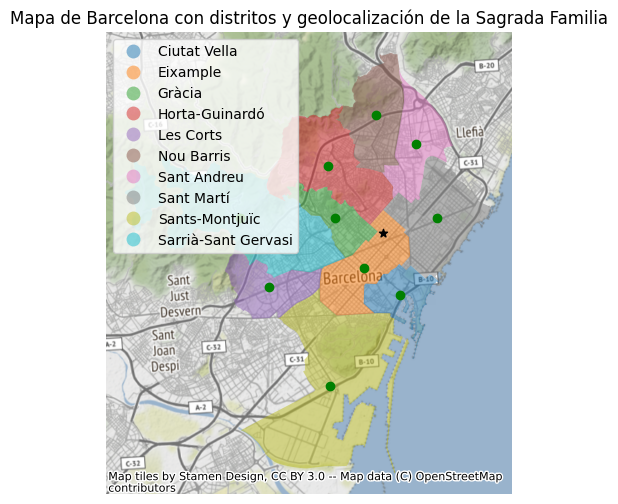

In [30]:
#MAPA DE BARCELONA PER DISTRICTES ON ES GEOLOCALITZA LA SAGRADA FAMÍLIA
import contextily
ax= districts.plot(column='district_name', figsize=(12,6), alpha=0.5, legend=True)
districts["centroid"].plot(ax=ax, color="green")
sagrada_fam.plot(ax=ax,color='black', marker='*')
contextily.add_basemap(ax, crs=districts.crs.to_string())
plt.title('Mapa de Barcelona con distritos y geolocalización de la Sagrada Familia')
plt.axis('off')
plt.show()

In [31]:
#afegim dades de padró
pop =pd.read_csv('/content/drive/MyDrive/Bicing/2022_padro_sexe.csv', usecols=['Nom_Districte','Nombre'])
pop = pd.DataFrame(pop.groupby('Nom_Districte')['Nombre'].sum()).reset_index()
pop.columns=['district_name','population_22']
districts = districts.merge(pop)
# districts

In [32]:
pop_22=pop

In [33]:
#POBLACIÓ DE BARCELONA PER DISTRICTES
pop_22['%']=pop.groupby('district_name')['population_22'].sum().sort_values(ascending=False).to_frame()

In [34]:
pop_22['%'] = pop_22['%'] / pop['population_22'].sum()

In [35]:
print('El total de población en Barcelona')
print('según el padrón del 2022 es de: '+str(pop['population_22'].sum()))
print('Distribuidos por los siguientes distritos,') 
print('ordenados de más a menos habitantes:')
pop_22

El total de población en Barcelona
según el padrón del 2022 es de: 1639981
Distribuidos por los siguientes distritos,
ordenados de más a menos habitantes:


,district_name,population_22,%
0,Ciutat Vella,106028,NaN
1,Eixample,266857,NaN
2,Gràcia,121915,NaN
3,Horta-Guinardó,172109,NaN
4,Les Corts,81074,NaN
5,Nou Barris,170736,NaN
6,Sant Andreu,149826,NaN
7,Sant Martí,239465,NaN
8,Sants-Montjuïc,183770,NaN
9,Sarrià-Sant Gervasi,148201,NaN


<Axes: >

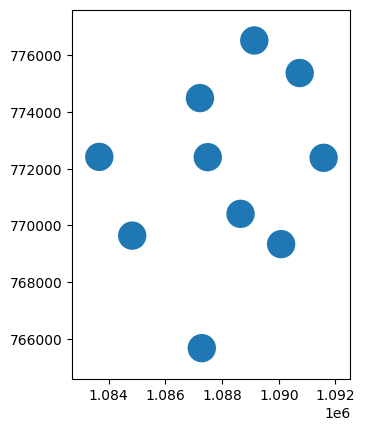

In [36]:
#fem un plot
parks = gpd.GeoDataFrame(districts.centroid.buffer(500), geometry=0)
parks.plot()

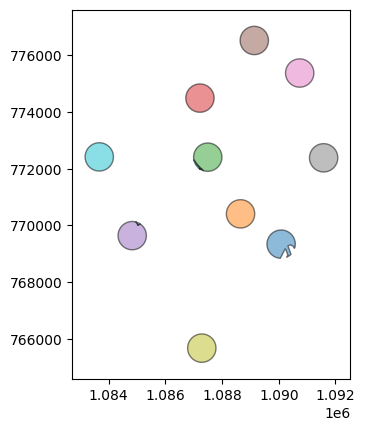

In [37]:
#fem un plot amb les interseccions
parks_intersection = districts.overlay(parks, how='intersection')
ax = parks_intersection.plot(alpha=0.5, edgecolor='black', column='district_name')

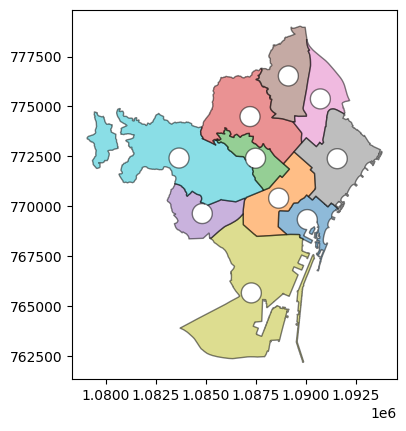

In [38]:
#ho traslladem al mapa de Bcn
parks_difference = districts.overlay(parks, how='difference')
ax = parks_difference.plot(alpha=0.5, edgecolor='black', column='district_name')

In [39]:
#total estacions
num_stations=stations['station_id'].count()
print("El número total d'estacions és de ", num_stations)

El número total d'estacions és de  505


In [40]:
#es calcula el número d'estacions per districte i % sobre el total
stations_dist=stations.groupby(['district'])['station_id'].count().sort_values(ascending=False).to_frame()

In [41]:
#cuidadín amb la número 191 i 509.

In [42]:
stations_dist['%'] = stations.groupby(['district'])['station_id'].count().sort_values(ascending=False).to_frame() / stations_dist['station_id'].count()
print("El número total de estaciones analizadas es de ", num_stations)
stations_dist.head(10)

El número total de estaciones analizadas es de  505


,station_id,%
district,,
Eixample,119,11.9
Sant Martí,83,8.3
Ciutat Vella,52,5.2
Sarrià-Sant Gervasi,48,4.8
Sants-Montjuic,47,4.7
Sant Andreu,42,4.2
Nou Barris,40,4.0
Horta-Guinardó,36,3.6
Les Corts,25,2.5


In [43]:
#total capacitat
capacity=stations['capacity'].sum()
print("El número total de docks és de ", capacity)

El número total de docks és de  13614


In [44]:
#es calcula el volum de capacitat de biciletes per districtes i el seu %

In [45]:
#volum de capacitat de biciletes per districtes
stations_dist_cap=stations.groupby(['district'])['capacity'].sum().sort_values(ascending=False).to_frame()

In [46]:
stations_dist_cap['%'] = stations.groupby(['district'])['capacity'].sum().sort_values(ascending=False).to_frame() / stations_dist_cap['capacity'].sum()
print("El número total de docks es de ", capacity)
stations_dist_cap.head(10)

El número total de docks es de  13614


,capacity,%
district,,
Eixample,3188,0.234171
Sant Martí,2416,0.177464
Sants-Montjuic,1352,0.099310
Sarrià-Sant Gervasi,1329,0.097620
Ciutat Vella,1301,0.095563
Sant Andreu,1099,0.080726
Nou Barris,984,0.072279
Horta-Guinardó,927,0.068092
Les Corts,686,0.050389


In [47]:
capacity_stations=stations['capacity'].tolist()
capacity_stations=[int(x) for x in capacity_stations] 

dictionary={}
for element in capacity_stations:
    if element in dictionary:
        dictionary[element]+=1
    else:
        dictionary[element] = 1
        
sorted_stations = dict(sorted(dictionary.items(), key=lambda item:item[0]))
print(sorted_stations)

{12: 1, 13: 1, 15: 7, 16: 6, 17: 3, 18: 21, 19: 9, 20: 15, 21: 42, 22: 7, 23: 9, 24: 48, 25: 12, 26: 24, 27: 154, 28: 16, 29: 6, 30: 10, 31: 12, 32: 31, 33: 25, 34: 5, 35: 2, 36: 7, 37: 1, 38: 1, 39: 7, 40: 3, 41: 1, 42: 2, 43: 5, 44: 2, 46: 1, 47: 1, 48: 1, 50: 1, 51: 1, 54: 5}


<Axes: >

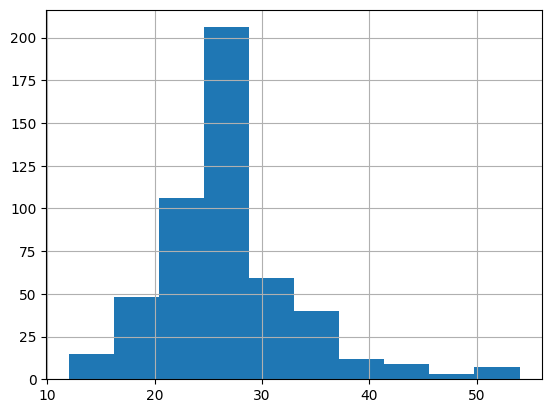

In [48]:
#el gràfic ens indica que la mitjana de punts en els dockstation són d'uns 27-28, aprox, que quadra amb les xifres anteriors
stations['capacity'].hist()
#El gráfico nos indica que la mediana de docks en las estaciones del Bicing, està en unos 27-28 docks.

In [49]:
stations_large=stations[stations['capacity']>30]

In [50]:
stations_large.groupby('district')['capacity'].count().sort_values()
#Distribución por distritos de las stations con más de 30 docks

district
Gràcia                  1
Horta-Guinardó          3
Nou Barris              5
Les Corts               6
Ciutat Vella            8
Sant Andreu             8
Sarrià-Sant Gervasi    11
Sants-Montjuic         19
Sant Martí             24
Eixample               29
Name: capacity, dtype: int64

In [51]:
#importem fitxer
# df2022=pd.read_csv('files/Bicing_2022.csv')
df2022=pd.read_csv('/content/drive/MyDrive/Bicing/Bicing_2022.csv')

In [52]:
#visualitzem la seva dimensió
df2022.shape

(52488992, 10)

In [53]:
# df2022['day']=df2022['day'].astype(str)
# df2022['day']=df2022['day'].astype(str)
# df2022['day']=df2022['day'].astype(str)
# df2022['day_year'] = df2022.day + str("/") + df2022.month + str("/") + df2022.year

In [54]:
#visualitzem primeres línies
df2022.head()

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,year,month,day,hour,min
0,1,18,12,6,28,2021,12,31,23,59
1,2,18,15,3,11,2021,12,31,23,59
2,3,12,12,0,15,2021,12,31,23,59
3,4,2,1,1,18,2021,12,31,23,59
4,5,6,4,2,33,2021,12,31,23,59


In [55]:
np.unique(df2022['year'], return_counts=True)  

(array([2021, 2022, 2023]), array([     503, 52486977,     1512]))

In [56]:
#seleccionem les línies que són igual a zero, és a dir, sense disponibilitat.
df2022_zero=df2022[df2022['num_docks_available']==0]
df2022_zero.head()

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,year,month,day,hour,min
17,19,30,10,20,0,2021,12,31,23,59
47,50,18,11,7,0,2021,12,31,23,59
168,179,16,9,7,0,2021,12,31,23,59
175,187,18,17,1,0,2021,12,31,23,59
220,232,26,24,2,0,2021,12,31,23,59


In [57]:
df2022_zero.shape

(1120448, 10)

In [58]:
#visualització per mesos
df2022_zero.groupby(['month'])['station_id'].count()
#SUMATORIO DE LA CAPACITY O DISPONIBILIDAD INFORMADA COMO CERO POR MESES.

month
1      65284
2      94294
3      85203
4      95935
5     121113
6     110070
7      94558
8      86300
9     124581
10     88058
11     87294
12     67758
Name: station_id, dtype: int64

In [59]:
#Visualització de les stations amb més registres amb availability igual a zero.
df2022_zero.groupby(['station_id'])['num_docks_available'].count().sort_values(ascending=False)
#SUMATORIO DE LA CAPACITY O DISPONIBILIDAD INFORMADA COMO CERO POR ESTACIONES DE MAYOR A MENOR.

station_id
31     20710
32     16346
378    15850
36     15372
439    14706
       ...  
294        5
139        5
338        4
327        1
497        1
Name: num_docks_available, Length: 488, dtype: int64

In [60]:
df_stations_dense=stations[(stations['station_id']==31) | (stations['station_id']==32) | (stations['station_id']==378) | (stations['station_id']==36) | (stations['station_id']==439)]

In [61]:
df_stations_dense

,station_id,name,lat,lon,altitude,address,post_code,district,capacity,weather_station
29,31,PL. DEL MAR,41.374800,2.188905,4.0,PL. DEL MAR,8003,Ciutat Vella,18,X4
30,32,LA BARCELONETA (CN BARCELONETA),41.373691,2.188928,4.0,LA BARCELONETA (CN BARCELONETA),8003,Ciutat Vella,15,X4
34,36,"AV. DE LA CATEDRAL, 6",41.385062,2.176683,8.0,"AV. DE LA CATEDRAL, 6",8002,Ciutat Vella,21,X4
367,378,"PL. JOAQUIM XIRAU I PALAU, 1",41.378538,2.176743,5.0,"PL. JOAQUIM XIRAU I PALAU, 1",8002,Ciutat Vella,21,X4
426,439,"RBLA. BADAL, 73 | C/ CONSTITUCIÃ",41.368539,2.132840,14.0,"RBLA. BADAL, 73 | C/ CONSTITUCIÃ",8014,Sants-Montjuic,18,X4


In [170]:
df_stations_dense = df_stations_dense[["station_id","name","lat","lon"]].drop_duplicates()
stations_map_dense = KeplerGl(height=600, data={"stations": df_stations_dense})
stations_map_dense

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'stations':      station_id                               name        lat       lon
29         …

In [62]:
#Analitzem la station 31.
df2022_zero[df2022_zero['station_id']==31]

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,year,month,day,hour,min
329396,31,17,14,3,0,2022,1,3,6,35
329899,31,17,14,3,0,2022,1,3,6,39
330402,31,17,14,3,0,2022,1,3,6,44
330905,31,17,14,3,0,2022,1,3,6,49
331408,31,17,14,3,0,2022,1,3,6,54
...,...,...,...,...,...,...,...,...,...,...
52435714,31,17,16,1,0,2022,12,31,15,29
52436216,31,18,16,2,0,2022,12,31,15,34
52436718,31,18,14,4,0,2022,12,31,15,39
52437220,31,17,13,4,0,2022,12,31,15,44


In [63]:
#comprovem "range" de la disponibilitat de les bicibletes als dock-stations
stations=np.unique(df2022['num_bikes_available'], return_counts=True)   #retorna els valors únics
stations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),
 array([4266442, 4163495, 3461112, 3071100, 2827635, 2649414, 2535296,
        2415802, 2321996, 2227652, 2138647, 2035161, 1945848, 1873530,
        1798745, 1692915, 1560670, 1427897, 1295244, 1137024,  973990,
         819776,  689171,  601685,  506805,  416777,  337340,  252954,
         175492,  150310,  129095,  106859,   84041,   58932,   43171,
          38361,   34715,   31693,   29885,   24872,   20124,   18234,
          16596,   14197,    9929,    8252,    8132,    7681,    6487,
           6420,    6127,    5451,    4622,    3215,    1976]))

In [64]:
#calculem la mitjana d'availability per dia & station_id
df22_mean=pd.DataFrame({'mean_availability' : df2022.groupby(["station_id","month","day","hour"])['num_docks_available'].mean()}).reset_index()

In [65]:
df22_mean.head()

,station_id,month,day,hour,mean_availability
0,1,1,1,0,24.666667
1,1,1,1,1,31.363636
2,1,1,1,2,33.250000
3,1,1,1,3,33.923077
4,1,1,1,4,33.000000


In [66]:
#visualitzem les estacions que tenen una mitja d'availability més baixa i els que la tenen més elevada.
df22_mean.groupby(["station_id"])['mean_availability'].mean().sort_values()

station_id
378     4.196604
179     5.195487
446     5.518517
165     6.097359
185     6.147329
         ...    
46     30.389772
1      30.611981
94     30.839086
170    30.996273
452    35.186096
Name: mean_availability, Length: 505, dtype: float64

In [67]:
df378_22=df22_mean[df22_mean['station_id']==378]
df378_22

,station_id,month,day,hour,mean_availability
3196012,378,1,1,0,2.333333
3196013,378,1,1,1,5.454545
3196014,378,1,1,2,4.583333
3196015,378,1,1,3,0.846154
3196016,378,1,1,4,0.000000
...,...,...,...,...,...
3204745,378,12,31,19,3.833333
3204746,378,12,31,20,3.166667
3204747,378,12,31,21,3.166667
3204748,378,12,31,22,0.916667


<Axes: xlabel='hour'>

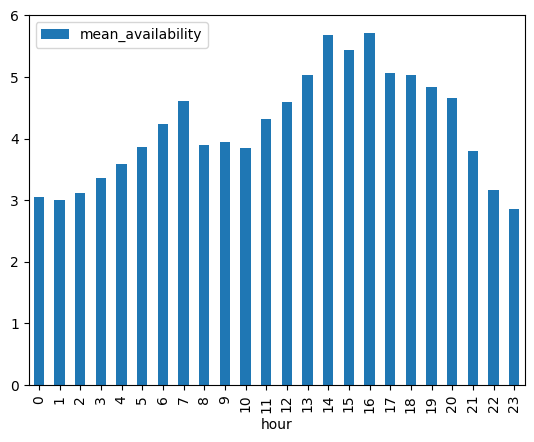

In [68]:
#la mitja per hores de l'estació 378, la que té menys availability de mitja només augmenta al migdia.
hours378=df378_22.groupby(['hour'])['mean_availability'].mean().to_frame()
hours378.plot(kind="bar")

<Axes: xlabel='hour'>

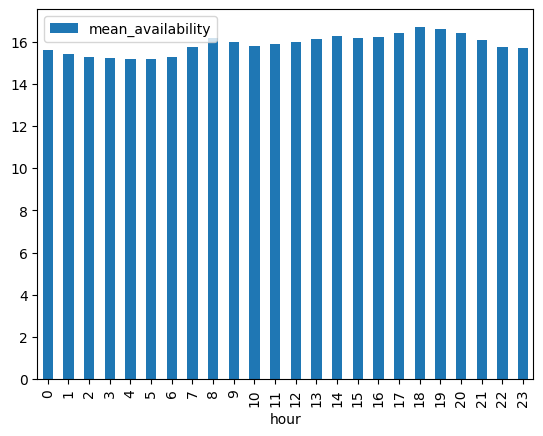

In [69]:
#la mitja d'availabilty per tot el dataset per hores
hours=df22_mean.groupby(["hour"])['mean_availability'].mean().to_frame()
hours.plot(kind="bar")

In [70]:
# df22_mean['hour'].hist(by=df22_mean['mean_availability'])
# stations=pd.read_csv('files/Inventari_docks_stations_2022.csv', delimiter=";", encoding='latin-1')
stations=pd.read_csv('/content/drive/MyDrive/Bicing/Inventari_docks_stations_2022.csv', delimiter=";", encoding='latin-1')

In [71]:
#fem un merge per fusionar el dataset de l'any 2022 amb el de les stations
df22_mean_all=pd.merge(df22_mean, stations, on='station_id')

In [72]:
df22_mean_all.head()

,station_id,month,day,hour,mean_availability,name,lat,lon,altitude,address,post_code,district,capacity,weather_station
0,1,1,1,0,24.666667,"GRAN VIA CORTS CATALANES, 760",41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,Eixample,46,X4
1,1,1,1,1,31.363636,"GRAN VIA CORTS CATALANES, 760",41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,Eixample,46,X4
2,1,1,1,2,33.250000,"GRAN VIA CORTS CATALANES, 760",41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,Eixample,46,X4
3,1,1,1,3,33.923077,"GRAN VIA CORTS CATALANES, 760",41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,Eixample,46,X4
4,1,1,1,4,33.000000,"GRAN VIA CORTS CATALANES, 760",41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,Eixample,46,X4


In [73]:
#s'endrecen les columnes i es suprimeixen les que no són útils
df22_mean_all=df22_mean_all[['station_id','name','month','day','mean_availability','district','capacity']]

In [74]:
df22_mean_all.head()

,station_id,name,month,day,mean_availability,district,capacity
0,1,"GRAN VIA CORTS CATALANES, 760",1,1,24.666667,Eixample,46
1,1,"GRAN VIA CORTS CATALANES, 760",1,1,31.363636,Eixample,46
2,1,"GRAN VIA CORTS CATALANES, 760",1,1,33.250000,Eixample,46
3,1,"GRAN VIA CORTS CATALANES, 760",1,1,33.923077,Eixample,46
4,1,"GRAN VIA CORTS CATALANES, 760",1,1,33.000000,Eixample,46


In [75]:
#es calcula la mitja de l'availability sobre el total capacity de cada station.
df22_mean_all['%A-C'] = df22_mean_all.apply(  
    lambda row: row.mean_availability / row.capacity, axis=1)


In [76]:
df22_mean_all.head()

,station_id,name,month,day,mean_availability,district,capacity,%A-C
0,1,"GRAN VIA CORTS CATALANES, 760",1,1,24.666667,Eixample,46,0.536232
1,1,"GRAN VIA CORTS CATALANES, 760",1,1,31.363636,Eixample,46,0.681818
2,1,"GRAN VIA CORTS CATALANES, 760",1,1,33.250000,Eixample,46,0.722826
3,1,"GRAN VIA CORTS CATALANES, 760",1,1,33.923077,Eixample,46,0.737458
4,1,"GRAN VIA CORTS CATALANES, 760",1,1,33.000000,Eixample,46,0.717391


In [77]:
#Es fa un groupby per saber quines tenen un % més baix, és a dir, són les més demandades.
df22_mean_all.groupby(["station_id","name","district"])['%A-C'].mean().sort_values()
#ESTUDIO DE LAS ESTACIONES CON % DE DISPONIBILIDAD RESPECTO SU CAPACIDAD TEÓRICA, ORDENADAS DE MENOR A MAYOR

station_id  name                                      district      
378         PL. JOAQUIM XIRAU I PALAU, 1              Ciutat Vella      0.199838
165         C/ DEL DOCTOR TRUETA, 222                 Sant Martí        0.225828
36          AV. DE LA CATEDRAL, 6                     Ciutat Vella      0.312996
114         PL. JEAN GENET,  1                        Ciutat Vella      0.319057
179         PG. ZONA FRANCA, 244                      Sants-Montjuic    0.324718
                                                                          ...   
481         PG. FABRA I PUIG, 411                     Nou Barris        0.864280
518         C/ LLOBREGÃS, 115                        Horta-Guinardó    0.865579
431         AV. JOAN XXIII, 17                        Les Corts         0.879362
44          AV. MERIDIANA, 66 (COSTAT METRO GLORIES)  Sant Martí        0.964482
482         PG. UNIVERSAL, 29 | C/ DOCTOR LETAMENDI   Nou Barris        1.025022
Name: %A-C, Length: 505, dtype: float64

In [164]:
df_stations_ava=stations[(stations['station_id']==165) | (stations['station_id']==1378) | (stations['station_id']==36) | (stations['station_id']==446) | (stations['station_id']==114) | (stations['station_id']==179)]
df_stations_ava

,station_id,name,lat,lon,altitude,address,post_code,district,capacity,weather_station
34,36,"AV. DE LA CATEDRAL, 6",41.385062,2.176683,8.0,"AV. DE LA CATEDRAL, 6",8002,Ciutat Vella,21,X4
108,114,"PL. JEAN GENET, 1",41.376735,2.174008,5.0,"PL. JEAN GENET, 1",8001,Ciutat Vella,20,X4
157,165,"C/ DEL DOCTOR TRUETA, 222",41.399217,2.204141,3.0,"C/ DEL DOCTOR TRUETA, 222",8005,Sant Martí,27,X4
169,179,"PG. ZONA FRANCA, 244",41.363520,2.136902,9.0,"PG. ZONA FRANCA, 244",8038,Sants-Montjuic,16,X4
433,446,"PG. JOAN DE BORBÃ, 42",41.377997,2.188423,4.0,"PG. JOAN DE BORBÃ, 42",8003,Ciutat Vella,15,X4


In [168]:
df_stations_ava = df_stations_ava[["station_id","name","lat","lon"]].drop_duplicates()
stations_map_ava = KeplerGl(height=600, data={"stations": df_stations_ava})
stations_map_ava

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'stations':      station_id                       name        lat       lon
34           36    …

In [78]:
#es crea una funció per incorporar la season.
def set_values(row, value):
    return value[row]
   
map_season ={1:"Winter", 2:"Winter", 3:"Winter", 4:"Spring", 5:"Spring", 6:"Spring", 7:"Summer", 8:"Summer", 9:"Summer", 10:"Fall", 11:"Fall", 12:"Fall"} 
   
df22_mean_all['Season'] = df22_mean_all['month'].apply(set_values, args =(map_season, )) 


In [79]:
df22_mean_all.head()

,station_id,name,month,day,mean_availability,district,capacity,%A-C,Season
0,1,"GRAN VIA CORTS CATALANES, 760",1,1,24.666667,Eixample,46,0.536232,Winter
1,1,"GRAN VIA CORTS CATALANES, 760",1,1,31.363636,Eixample,46,0.681818,Winter
2,1,"GRAN VIA CORTS CATALANES, 760",1,1,33.250000,Eixample,46,0.722826,Winter
3,1,"GRAN VIA CORTS CATALANES, 760",1,1,33.923077,Eixample,46,0.737458,Winter
4,1,"GRAN VIA CORTS CATALANES, 760",1,1,33.000000,Eixample,46,0.717391,Winter


In [80]:
#Es fa un groupby incloent la season.
df22_mean_all.groupby(["station_id","name","Season","capacity"])['%A-C'].mean().sort_values()

station_id  name                                      Season  capacity
165         C/ DEL DOCTOR TRUETA, 222                 Winter  27          0.158900
378         PL. JOAQUIM XIRAU I PALAU, 1              Winter  21          0.160793
                                                      Spring  21          0.174086
36          AV. DE LA CATEDRAL, 6                     Fall    21          0.199454
165         C/ DEL DOCTOR TRUETA, 222                 Fall    27          0.221946
                                                                            ...   
482         PG. UNIVERSAL, 29 | C/ DOCTOR LETAMENDI   Winter  20          1.004641
                                                      Fall    20          1.015999
                                                      Spring  20          1.018148
44          AV. MERIDIANA, 66 (COSTAT METRO GLORIES)  Winter  13          1.042179
482         PG. UNIVERSAL, 29 | C/ DOCTOR LETAMENDI   Summer  20          1.060603
Name: %A-C, Leng

In [81]:
#es fa el groupby per station & season.
df22_mean_all.groupby(["station_id","name","Season"])['%A-C'].mean()

station_id  name                           Season
1           GRAN VIA CORTS CATALANES, 760  Fall      0.666979
                                           Spring    0.675356
                                           Summer    0.666460
                                           Winter    0.652555
2           C/ ROGER DE FLOR, 126          Fall      0.614002
                                                       ...   
518         C/ LLOBREGÃS, 115             Winter    0.905903
519         C/ PEDRELL, 52                 Fall      0.641321
                                           Spring    0.749279
                                           Summer    0.685410
                                           Winter    0.653971
Name: %A-C, Length: 2019, dtype: float64

In [82]:
df22_winter=df22_mean_all[df22_mean_all.loc[:, 'Season'] == 'Winter']

In [83]:
df22_spring=df22_mean_all[df22_mean_all.loc[:, 'Season'] == 'Spring']

In [84]:
df22_summer=df22_mean_all[df22_mean_all.loc[:, 'Season'] == 'Summer']

In [85]:
df22_fall=df22_mean_all[df22_mean_all.loc[:, 'Season'] == 'Fall']

In [86]:
#MEAN_AVAILABITY WINTER
df22_winter.groupby(["station_id","name"])['mean_availability'].mean().sort_values()
#ESTUDIO DE LA MEDIA DE CAPACIDAD MEDIA EN INVIERNO

station_id  name                                     
378         PL. JOAQUIM XIRAU I PALAU, 1                  3.376644
165         C/ DEL DOCTOR TRUETA, 222                     4.290293
179         PG. ZONA FRANCA, 244                          5.970397
185         C/GAVÃ, 81                                   6.798936
292         C/ AMILCAR, 1                                 6.902958
                                                           ...    
13          CARRER DE LA MARINA, 25-33                   32.078928
10          C/ 60, NÃMERO 25                            33.239004
46          C/ RAMON TRIAS FARGAS, 19 (D)                33.623656
170         AV. LITORAL, 40 (D)                          33.677771
452         GRAN VIA DE LES CORTS CATALANES, 1157 (D)    39.857955
Name: mean_availability, Length: 505, dtype: float64

In [87]:
#MEAN_AVAILABITY SPRING
df22_spring.groupby(["station_id","name"])['mean_availability'].mean().sort_values()
#ESTUDIO DE LA MEDIA DE CAPACIDAD MEDIA EN PRIMAVERA

station_id  name                                     
378         PL. JOAQUIM XIRAU I PALAU, 1                  3.655804
446         PG. JOAN DE BORBÃ, 42                        4.581452
114         PL. JEAN GENET,  1                            5.657329
179         PG. ZONA FRANCA, 244                          5.818066
31          PL. DEL MAR                                   6.056679
                                                           ...    
490         PG. VALL D'HEBRÃN, 168                      31.048111
1           GRAN VIA CORTS CATALANES, 760                31.066389
170         AV. LITORAL, 40 (D)                          31.414942
94          GRAN VIA DE LES CORTS CATALANES,375          33.348258
452         GRAN VIA DE LES CORTS CATALANES, 1157 (D)    36.442000
Name: mean_availability, Length: 504, dtype: float64

In [88]:
#MEAN_AVAILABITY SUMMER
df22_summer.groupby(["station_id","name"])['mean_availability'].mean().sort_values()
#ESTUDIO DE LA MEDIA DE CAPACIDAD MEDIA EN VERANO

station_id  name                                     
446         PG. JOAN DE BORBÃ, 42                        4.708386
179         PG. ZONA FRANCA, 244                          4.813346
378         PL. JOAQUIM XIRAU I PALAU, 1                  4.924430
185         C/GAVÃ, 81                                   5.208420
55          LA RAMBLA, 80                                 5.540499
                                                           ...    
171         AV. LITORAL, 172                             29.402765
1           GRAN VIA CORTS CATALANES, 760                30.657151
94          GRAN VIA DE LES CORTS CATALANES,375          32.270165
170         AV. LITORAL, 40 (D)                          32.458881
452         GRAN VIA DE LES CORTS CATALANES, 1157 (D)    34.139280
Name: mean_availability, Length: 505, dtype: float64

In [89]:
#MEAN_AVAILABITY FALL
df22_fall.groupby(["station_id","name"])['mean_availability'].mean().sort_values()
#ESTUDIO DE LA MEDIA DE CAPACIDAD MEDIA EN OTOÑO

station_id  name                                     
36          AV. DE LA CATEDRAL, 6                         4.188537
179         PG. ZONA FRANCA, 244                          4.236657
378         PL. JOAQUIM XIRAU I PALAU, 1                  4.797791
55          LA RAMBLA, 80                                 5.771364
446         PG. JOAN DE BORBÃ, 42                        5.872994
                                                           ...    
490         PG. VALL D'HEBRÃN, 168                      30.040540
5           PG. LLUIS COMPANYS, 11 (ARC TRIOMF)          30.184188
452         GRAN VIA DE LES CORTS CATALANES, 1157 (D)    30.471711
1           GRAN VIA CORTS CATALANES, 760                30.681044
46          C/ RAMON TRIAS FARGAS, 19 (D)                31.276629
Name: mean_availability, Length: 505, dtype: float64

In [90]:
df_stations_seasons=stations[(stations['station_id']==165) | (stations['station_id']==114) | (stations['station_id']==179) | (stations['station_id']==446) | (stations['station_id']==185) | (stations['station_id']==55)]
df_stations_seasons

,station_id,name,lat,lon,altitude,address,post_code,district,capacity,weather_station
52,55,"LA RAMBLA, 80",41.381192,2.173501,8.0,"LA RAMBLA, 80",8002,Ciutat Vella,19,X4
108,114,"PL. JEAN GENET, 1",41.376735,2.174008,5.0,"PL. JEAN GENET, 1",8001,Ciutat Vella,20,X4
157,165,"C/ DEL DOCTOR TRUETA, 222",41.399217,2.204141,3.0,"C/ DEL DOCTOR TRUETA, 222",8005,Sant Martí,27,X4
169,179,"PG. ZONA FRANCA, 244",41.363520,2.136902,9.0,"PG. ZONA FRANCA, 244",8038,Sants-Montjuic,16,X4
174,185,"C/GAVÃ, 81",41.370372,2.138944,20.0,"C/GAVÃ, 81",8014,Sants-Montjuic,17,X4
433,446,"PG. JOAN DE BORBÃ, 42",41.377997,2.188423,4.0,"PG. JOAN DE BORBÃ, 42",8003,Ciutat Vella,15,X4


In [163]:
df_stations_season = df_season[["station_id","name","lat","lon"]].drop_duplicates()
stations_map_season = KeplerGl(height=600, data={"stations": df_stations_season})
stations_map_season

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'stations':      station_id                                      name        lat       lon
49  …

In [114]:
#Anàlisi dia de la cursa del Corte Inglés .
cursa_ci=df2022_zero[(df2022_zero['month']==5) & (df2022_zero['day']==7)]
cursa_ci[cursa_ci['num_docks_available']==0].groupby('station_id').count().sort_values(by='num_docks_available', ascending=False)

,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,year,month,day,hour,min
station_id,,,,,,,,,
31,99,99,99,99,99,99,99,99,99
117,98,98,98,98,98,98,98,98,98
126,92,92,92,92,92,92,92,92,92
167,91,91,91,91,91,91,91,91,91
14,90,90,90,90,90,90,90,90,90
...,...,...,...,...,...,...,...,...,...
421,2,2,2,2,2,2,2,2,2
465,1,1,1,1,1,1,1,1,1
43,1,1,1,1,1,1,1,1,1


In [115]:
df_cursa=stations[(stations['station_id']==31) | (stations['station_id']==117) | (stations['station_id']==126) | (stations['station_id']==167) | (stations['station_id']==14)]
df_cursa

,station_id,name,lat,lon,altitude,address,post_code,district,capacity,weather_station
13,14,"AV. MARQUÃS DE L'ARGENTERA, 15",41.384844,2.185085,5.0,"AV. MARQUÃS DE L'ARGENTERA, 15",8003,Ciutat Vella,27,X4
29,31,PL. DEL MAR,41.374800,2.188905,4.0,PL. DEL MAR,8003,Ciutat Vella,18,X4
111,117,"C/ ROSA SENSAT, 12",41.390605,2.197231,5.0,"C/ ROSA SENSAT, 12",8005,Sant Martí,21,X4
120,126,PG. DE COLOM /VIA LAIETANA,41.380628,2.182282,4.0,PG. DE COLOM /VIA LAIETANA,8002,Ciutat Vella,23,X4
159,167,"C/ BAC DE RODA, 11",41.402335,2.210578,3.0,"C/ BAC DE RODA, 11",8005,Sant Martí,21,X4


In [116]:
df_stations_cursa = df_cursa[["station_id","name","lat","lon"]].drop_duplicates()
stations_map_cursa = KeplerGl(height=600, data={"stations": df_stations_cursa})
stations_map_cursa


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'stations':      station_id                              name        lat       lon
13          …

In [155]:
#Anàlisi dies festius.
festa=[df2022_zero[(df2022_zero['month']==4) & (df2022_zero['day']==15)]] or [df2022_zero[(df2022_zero['month']==4) & (df2022_zero['day']==18)]] or [df2022_zero[(df2022_zero['month']==6) & (df2022_zero['day']==24)]] or [df2022_zero[(df2022_zero['month']==8) & (df2022_zero['day']==15)]] or [df2022_zero[(df2022_zero['month']==10) & (df2022_zero['day']==12)]] or [df2022_zero[(df2022_zero['month']==11) & (df2022_zero['day']==1)]] or [df2022_zero[(df2022_zero['month']==12) & (df2022_zero['day']==6)]] or [df2022_zero[(df2022_zero['month']==12) & (df2022_zero['day']==8)]]
festa=festa[0]
festa[festa['num_docks_available']==0].groupby('station_id').count().sort_values(by='num_docks_available', ascending=False)

,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,year,month,day,hour,min
station_id,,,,,,,,,
165,98,98,98,98,98,98,98,98,98
99,86,86,86,86,86,86,86,86,86
439,77,77,77,77,77,77,77,77,77
446,75,75,75,75,75,75,75,75,75
31,71,71,71,71,71,71,71,71,71
...,...,...,...,...,...,...,...,...,...
427,1,1,1,1,1,1,1,1,1
24,1,1,1,1,1,1,1,1,1
106,1,1,1,1,1,1,1,1,1


In [150]:
df_festa=stations[(stations['station_id']==165) | (stations['station_id']==99) | (stations['station_id']==439) | (stations['station_id']==446) | (stations['station_id']==31)]
df_festa

,station_id,name,lat,lon,altitude,address,post_code,district,capacity,weather_station
29,31,PL. DEL MAR,41.374800,2.188905,4.0,PL. DEL MAR,8003,Ciutat Vella,18,X4
93,99,"C/ VIRIAT, 53",41.380822,2.141539,30.0,"C/ VIRIAT, 53",8014,Sants-Montjuic,21,X4
157,165,"C/ DEL DOCTOR TRUETA, 222",41.399217,2.204141,3.0,"C/ DEL DOCTOR TRUETA, 222",8005,Sant Martí,27,X4
426,439,"RBLA. BADAL, 73 | C/ CONSTITUCIÃ",41.368539,2.132840,14.0,"RBLA. BADAL, 73 | C/ CONSTITUCIÃ",8014,Sants-Montjuic,18,X4
433,446,"PG. JOAN DE BORBÃ, 42",41.377997,2.188423,4.0,"PG. JOAN DE BORBÃ, 42",8003,Ciutat Vella,15,X4


In [151]:
df_stations_festa = df_festa[["station_id","name","lat","lon"]].drop_duplicates()
stations_map_festa = KeplerGl(height=600, data={"stations": df_stations_festa})
stations_map_festa

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'stations':      station_id                               name        lat       lon
29         …

In [152]:
#Anàlisi Festa Major.
merce=[df2022_zero[(df2022_zero['month']==9) & (df2022_zero['day']==23)]] or [df2022_zero[(df2022_zero['month']==9) & (df2022_zero['day']==24)]] or [df2022_zero[(df2022_zero['month']==9) & (df2022_zero['day']==25)]] or [df2022_zero[(df2022_zero['month']==9) & (df2022_zero['day']==26)]] or [df2022_zero[(df2022_zero['month']==9) & (df2022_zero['day']==22)]] 
merce=merce[0]
merce[merce['num_docks_available']==0].groupby('station_id').count().sort_values(by='num_docks_available', ascending=False)

,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,year,month,day,hour,min
station_id,,,,,,,,,
75,178,178,178,178,178,178,178,178,178
185,109,109,109,109,109,109,109,109,109
54,108,108,108,108,108,108,108,108,108
351,93,93,93,93,93,93,93,93,93
187,84,84,84,84,84,84,84,84,84
...,...,...,...,...,...,...,...,...,...
118,1,1,1,1,1,1,1,1,1
273,1,1,1,1,1,1,1,1,1
252,1,1,1,1,1,1,1,1,1


In [153]:
df_merce=stations[(stations['station_id']==75) | (stations['station_id']==185) | (stations['station_id']==54) | (stations['station_id']==351) | (stations['station_id']==187)]
df_merce

,station_id,name,lat,lon,altitude,address,post_code,district,capacity,weather_station
51,54,"C/ SANT OLEGUER, 2",41.377532,2.170732,6.0,"C/ SANT OLEGUER, 2",8001,Ciutat Vella,19,X4
71,75,"AV. JOSEP TARRADELLAS, 58",41.385004,2.142911,40.0,"AV. JOSEP TARRADELLAS, 58",8029,Eixample,21,X4
174,185,"C/GAVÃ, 81",41.370372,2.138944,20.0,"C/GAVÃ, 81",8014,Sants-Montjuic,17,X4
176,187,"C/ DE SANT PAU, 89 - 97",41.376881,2.169821,5.0,"C/ DE SANT PAU, 89 - 97",8001,Ciutat Vella,19,X4
340,351,"C/ JANE ADDAMS, 26/ CRTA. DEL PRAT",41.362123,2.135619,9.0,"C/ JANE ADDAMS, 26/ CRTA. DEL PRAT",8038,Sants-Montjuic,33,X4


In [154]:
df_stations_merce = df_merce[["station_id","name","lat","lon"]].drop_duplicates()
stations_map_merce = KeplerGl(height=600, data={"stations": df_stations_merce})
stations_map_merce

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'stations':      station_id                                name        lat       lon
51        …

In [156]:
#Anàlisi Partits Camp Nou.
barsa=[df2022_zero[(df2022_zero['month']==1) & (df2022_zero['day']==19)]] or [df2022_zero[(df2022_zero['month']==2) & (df2022_zero['day']==6)]] or [df2022_zero[(df2022_zero['month']==2) & (df2022_zero['day']==27)]] or [df2022_zero[(df2022_zero['month']==3) & (df2022_zero['day']==13)]] or [df2022_zero[(df2022_zero['month']==4) & (df2022_zero['day']==3)]] or [df2022_zero[(df2022_zero['month']==4) & (df2022_zero['day']==17)]] or [df2022_zero[(df2022_zero['month']==5) & (df2022_zero['day']==1)]] or [df2022_zero[(df2022_zero['month']==5) & (df2022_zero['day']==11)]] or [df2022_zero[(df2022_zero['month']==5) & (df2022_zero['day']==11)]] or [df2022_zero[(df2022_zero['month']==5) & (df2022_zero['day']==22)]]
barsa=barsa[0]
barsa[barsa['num_docks_available']==0].groupby('station_id').count().sort_values(by='num_docks_available', ascending=False)

,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,year,month,day,hour,min
station_id,,,,,,,,,
378,126,126,126,126,126,126,126,126,126
165,89,89,89,89,89,89,89,89,89
55,61,61,61,61,61,61,61,61,61
211,58,58,58,58,58,58,58,58,58
423,48,48,48,48,48,48,48,48,48
...,...,...,...,...,...,...,...,...,...
373,1,1,1,1,1,1,1,1,1
111,1,1,1,1,1,1,1,1,1
427,1,1,1,1,1,1,1,1,1


In [157]:
df_barsa=stations[(stations['station_id']==378) | (stations['station_id']==165) | (stations['station_id']==55) | (stations['station_id']==211) | (stations['station_id']==423)]
df_barsa

,station_id,name,lat,lon,altitude,address,post_code,district,capacity,weather_station
52,55,"LA RAMBLA, 80",41.381192,2.173501,8.0,"LA RAMBLA, 80",8002,Ciutat Vella,19,X4
157,165,"C/ DEL DOCTOR TRUETA, 222",41.399217,2.204141,3.0,"C/ DEL DOCTOR TRUETA, 222",8005,Sant Martí,27,X4
200,211,"C/ SANCHO DE ÃVILA, 60-64",41.398754,2.190212,5.0,"C/ SANCHO DE ÃVILA, 60-64",8018,Sant Martí,28,X4
367,378,"PL. JOAQUIM XIRAU I PALAU, 1",41.378538,2.176743,5.0,"PL. JOAQUIM XIRAU I PALAU, 1",8002,Ciutat Vella,21,X4
410,423,"C/ HONDURAS, 32-34",41.420246,2.189485,22.0,"C/ HONDURAS, 32-34",8027,Sant Andreu,32,X4


In [158]:
df_stations_barsa = df_barsa[["station_id","name","lat","lon"]].drop_duplicates()
stations_map_barsa = KeplerGl(height=600, data={"stations": df_stations_barsa})
stations_map_barsa

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'stations':      station_id                          name        lat       lon
52           55 …

**PRIMERES CONCLUSIONS**
* Els districtes amb més stations són l'Eixample & St. Martí & Ciutat Vella.
* Els districtes amb més punts capacitat de bicicletes, són Eixample, St. Martí, altres districtes i Ciutat Vella.
* La mitjana de capacitat de les stations és de 27-28 punts.
* Els docs van d'un mínim de 12 a un màxim de 54 punts.
* De l'estudi de les línies que tenen zero availability es veu que els mesos amb més incidència són maig, juny, juliol i setembre (mesos d'estudi i bàsicament els més propers a la primavera i la tardor). A l'agost es veu la reducció del volum d'habitants i també la calor de juliol i part de juny fa que no hi hagi tants problemes d'availability.
* Les stations amb més línees amb zero availability són la 31, 32, 378, 36 i la 430.
* Algunes stations són les que reiterativament tenen menys availability, tot i que a l'estiu varia el ranking, es centra en el centre de la ciutat i la part marítima.

DADES BICING:

https://www.bicing.barcelona/es/datos-bicing##reference-1

INFORMACIÓ BACC:

https://bacc.cat/bicicleta/2023/radiografia-ciclista-de-barcelona-resultats-de-lestudi/

https://bacc.cat/comunicacio/estudis/2022/resultats-de-lanalisi-dus-dels-carrils-bici-de-barcelona-recompte-segons-perfils/
